# salary project

we are going to implement our salary prediction using the machine learning algorithm. This model predicts the salary of the employee based on the year of experince of employee. this is a regression problem which is solved using a LinearRegression. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Loading the data

In [3]:
data = pd.read_csv(r"C:\Users\Ashwini\Documents\Salaries.csv")

In [4]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# cheking null value is is there or not 

Now perform an Exploratory data analysis. in Exploratory Data Analysis, firstly we check that there the information of the data, then describe the data which shows the mean value, standard deviation value, minimum value, maximum value ect..

In [5]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# visualize data

now visualize the data yearsService and salary using the matlab function scatter.

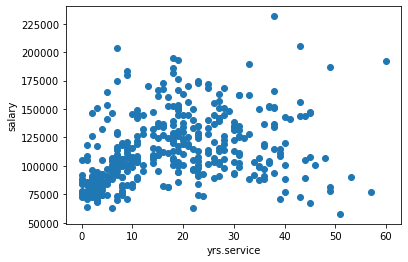

In [8]:
plt.scatter( data['yrs.service'] ,data['salary'] )
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.show()

now its time to prepare the data, divide the data into the independent and dependent features. X stores the independent feature ('yer.service') and y  stored the dependent features(salary


Then split the data into the training and testing the train_test_split function which takes some of the parameters like X,Y, random_state, test_size. X is an independent feature and y is the dependent feature, random_state used for randomly selecting the data and test_size used for dividing the data into the training and testing. 

example: if test_size is 20% then automatically training size is 80%. train_test_split function return four parameters are X_train, Xtest, y_train, y_test. X_train stores the independent feature and these both x_train and y_train are used for train the model. X_test stores the independent feature and Y_test stores the dependent feature and these both X_test and y_test are used for test the model and evaluate the model.

# Prepare data

In [10]:
x = data.drop('salary',axis=1)
y = data['salary']

In [11]:
x.shape

(397, 5)

In [12]:
y.shape

(397,)

# Split data into train and test

In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((317, 1), (80, 1), (317,), (80,))

now define tthe LinearRegression model with by default parameters and trained LinearRegression model with training data(X_train and y_train). And the the model using the testing data(X_test). and display the predicted and actual data.

# Define LinearRegression Model

In [17]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

# Test model

In [18]:
pred = lr.predict(X_test)
pred

array([122583.39091848, 107907.22154907, 107907.22154907, 122583.39091848,
       105810.62592487, 112100.41279747, 103714.03030066, 114197.00842167,
       105810.62592487, 103015.1650926 , 126077.71695882, 114197.00842167,
       118390.19967008, 107907.22154907, 107907.22154907, 126077.71695882,
       107907.22154907, 108606.08675714, 106509.49113293, 114197.00842167,
       115594.73883781, 113498.14321361, 110702.68238134, 107208.356341  ,
       127475.44737495, 107208.356341  , 128873.17779109, 114895.87362974,
       123981.12133462, 108606.08675714, 119787.93008621, 126776.58216689,
       118390.19967008, 122583.39091848, 112799.27800554, 112100.41279747,
       108606.08675714, 103015.1650926 , 127475.44737495, 132367.50383142,
       119787.93008621, 101617.43467646, 120486.79529428, 105810.62592487,
       108606.08675714, 118390.19967008, 113498.14321361, 121884.52571041,
       100918.56946839, 123981.12133462, 119787.93008621, 100918.56946839,
       129572.04299915, 1

now calculate the difference between the actual salary value and the predicted salary value and make a DataFrame and show the data of actual salary, predicted salary and the difference btween the actual salary and predicted salary

In [19]:
Y_test

38     125196
187    107500
221    145200
109    131205
91     105128
        ...  
181    141136
17     103450
89     107008
57      90215
255     83000
Name: salary, Length: 80, dtype: int64

# Check Actual data, Predicted data and different between the Actual and Predicted data

In [20]:
diff = Y_test = pred

In [21]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,122583.390918,122583.390918,122583.390918
1,107907.221549,107907.221549,107907.221549
2,107907.221549,107907.221549,107907.221549
3,122583.390918,122583.390918,122583.390918
4,105810.625925,105810.625925,105810.625925
...,...,...,...
75,104412.895509,104412.895509,104412.895509
76,124679.986543,124679.986543,124679.986543
77,105810.625925,105810.625925,105810.625925
78,106509.491133,106509.491133,106509.491133


now visualize the training data, draw the best fit line and Plot all the training points of the training data and see the bias. Bias is the difference between the best fit line and the training point. This difference is called the bias(error)

# Visualize Model, that how it is performing on training data

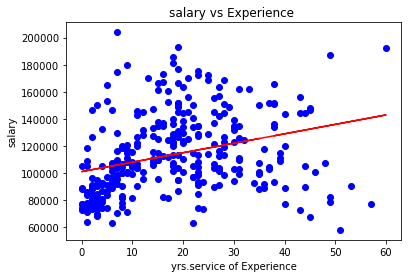

In [22]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train , lr.predict(X_train),color='red')
plt.title('salary vs Experience ')
plt.xlabel('yrs.service of Experience')
plt.ylabel("salary")
plt.show()

Now visualize the testing data, draw the best fit line and Plot all the testing points of the testing data and see the bias.

# Visualize Model, that how it is performing on testing data

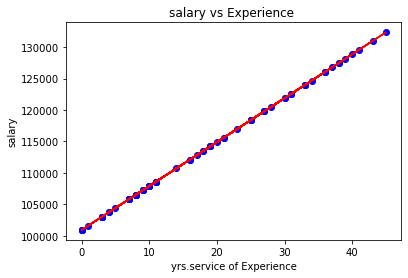

In [23]:
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test , lr.predict(X_test) , color='red')
plt.title('salary vs Experience ')
plt.xlabel('yrs.service of Experience')
plt.ylabel("salary")
plt.show()


# Evaluate

check the accuracy of the model which is approximately 98% accuracy on the testing data and also check the mean squared error and r2_score using the actual data and  predicted data.

In [24]:
lr.score(X_test , Y_test)

1.0

In [25]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)

In [26]:
rmse , r2

(0.0, 1.0)

# Test on the custom data 

now the last step is to test on the custom data so i gave 3 years of experience to my model and check what is the salary of the 3 years of experinced employee. my model predicts that the salary is 103015 .


then again i gave 5 years of experince to my model and my model predicts that the salary is 1004412 .

In [35]:
exp = 3 
lr.predict([[exp]])[0]
print(f"salary of {exp} year experince employee = {int(lr.predict([[exp]])[0])} ")

salary of 3 year experince employee = 103015 


E:\Users\Ashwini\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Users\Ashwini\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
exp = 5
lr.predict([[exp]])[0]
print(f"salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} ")

salary of 5 year experience employee = 104412 


E:\Users\Ashwini\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Users\Ashwini\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
